In [60]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.0.0


In [61]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [63]:
dataset=pd.read_csv("F:\\tensorflow_Traing_TfliteConverting_imageClsification\\prediction_traing\\Prediction\\datan.csv") 

del dataset['|']
del dataset['DeviceName']
del dataset['Mac']
dataset.tail()

,BetteryCp,BetteryValue,BetteryValueOwner,BluVersion,Tem,TemOwner,bleOwner,output,rssi
685,4500,75,64,4.0,55.000,45.061,4.1,0,-81
686,2900,54,71,4.1,47.901,50.000,4.0,0,-81
687,4500,75,55,4.0,55.000,37.000,5.0,0,-76
688,2900,74,57,4.1,54.153,37.000,5.0,1,-60
689,2900,58,53,4.1,46.946,37.000,5.0,0,-56


In [64]:
dataset.isna().sum()

BetteryCp            0
BetteryValue         0
BetteryValueOwner    0
BluVersion           0
Tem                  0
TemOwner             0
bleOwner             0
output               0
rssi                 0
dtype: int64

In [65]:
dataset = dataset.dropna()

In [67]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,BetteryCp,BetteryValue,BetteryValueOwner,BluVersion,Tem,TemOwner,bleOwner,output,rssi
685,4500,75,64,4.0,55.000,45.061,4.1,0,-81
686,2900,54,71,4.1,47.901,50.000,4.0,0,-81
687,4500,75,55,4.0,55.000,37.000,5.0,0,-76
688,2900,74,57,4.1,54.153,37.000,5.0,1,-60
689,2900,58,53,4.1,46.946,37.000,5.0,0,-56


In [68]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

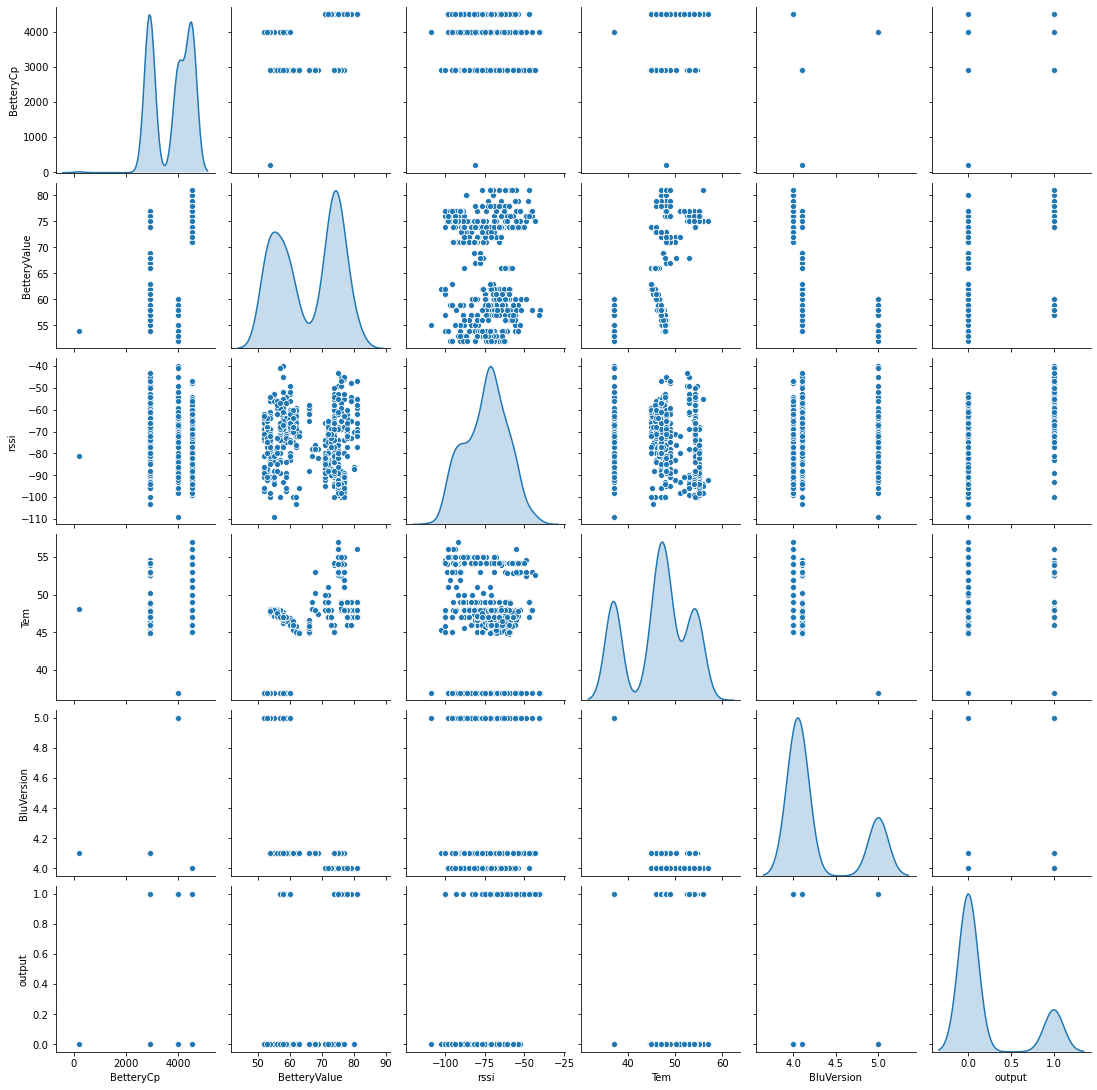

In [69]:
sns.pairplot(train_dataset[["BetteryCp", "BetteryValue", "rssi", "Tem","BluVersion","output"]], diag_kind="kde")

In [70]:
train_stats = train_dataset.describe()
train_stats.pop("output")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
BetteryCp,552.0,3743.115942,722.234183,200.0,2900.0,4000.0000,4500.00000,4500.0
BetteryValue,552.0,65.916667,9.514357,52.0,57.0,70.0000,75.00000,81.0
BetteryValueOwner,552.0,62.447464,9.337829,52.0,55.0,58.0000,72.00000,81.0
BluVersion,552.0,4.290942,0.413990,4.0,4.0,4.1000,5.00000,5.0
Tem,552.0,46.480844,6.275311,37.0,37.0,47.1525,52.50000,57.0
TemOwner,552.0,42.168324,5.485440,37.0,37.0,37.0000,47.72625,54.0
bleOwner,552.0,4.531703,0.485348,4.0,4.0,5.0000,5.00000,5.0
rssi,552.0,-74.003623,13.223610,-109.0,-84.0,-73.0000,-65.00000,-40.0


In [71]:
train_labels = train_dataset.pop('output')
test_labels = test_dataset.pop('output')

In [72]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [73]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, Re, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [74]:
model = build_model()

In [75]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [76]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.12520476],
       [-0.18337908],
       [ 0.0768655 ],
       [-0.15719064],
       [-0.31861213],
       [ 0.00345198],
       [-0.2069218 ],
       [ 0.06061112],
       [-0.19399704],
       [-0.39670625]], dtype=float32)

In [78]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.0134,  mae:0.0546,  mse:0.0134,  val_loss:0.0083,  val_mae:0.0570,  val_mse:0.0083,  
....................................................................................................
Epoch: 100, loss:0.0090,  mae:0.0469,  mse:0.0090,  val_loss:0.0074,  val_mae:0.0503,  val_mse:0.0074,  
....................................................................................................
Epoch: 200, loss:0.0086,  mae:0.0455,  mse:0.0086,  val_loss:0.0067,  val_mae:0.0442,  val_mse:0.0067,  
....................................................................................................
Epoch: 300, loss:0.0060,  mae:0.0342,  mse:0.0060,  val_loss:0.0067,  val_mae:0.0432,  val_mse:0.0067,  
....................................................................................................
Epoch: 400, loss:0.0047,  mae:0.0278,  mse:0.0047,  val_loss:0.0072,  val_mae:0.0380,  val_mse:0.0072,  
........................................................................

In [79]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.003209,0.019701,0.003209,0.010191,0.034250,0.010191,995
996,0.003192,0.018738,0.003192,0.010412,0.040782,0.010412,996
997,0.003859,0.019974,0.003859,0.008050,0.037375,0.008050,997
998,0.003460,0.016734,0.003460,0.011508,0.038246,0.011508,998
999,0.003774,0.022080,0.003774,0.009655,0.039152,0.009655,999


In [80]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [output]')

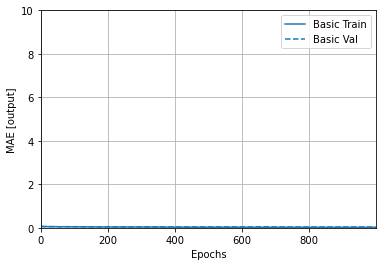

In [82]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [output]')

Text(0, 0.5, 'MSE [output*1000]')

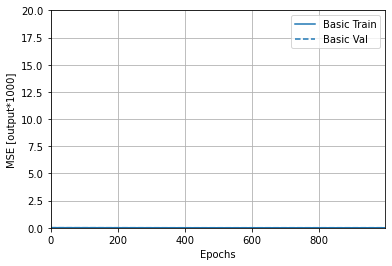

In [83]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [output*1000]')

In [84]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.0954,  mae:0.2174,  mse:0.0954,  val_loss:0.0643,  val_mae:0.1881,  val_mse:0.0643,  
....................................

Text(0, 0.5, 'MAE [MPG]')

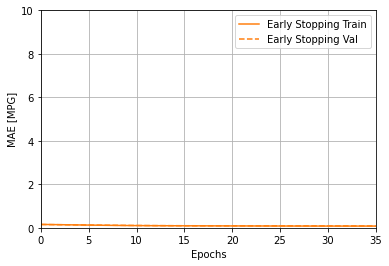

In [85]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

In [86]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

138/138 - 0s - loss: 0.0193 - mae: 0.0683 - mse: 0.0193
Testing set Mean Abs Error:  0.07 MPG


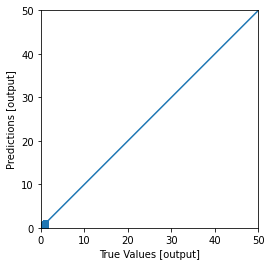

In [87]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [output]')
plt.ylabel('Predictions [output]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


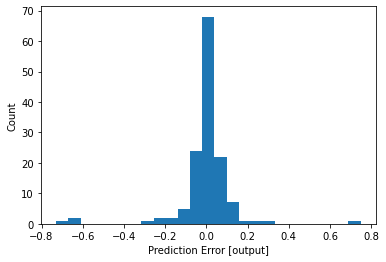

In [88]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [output]")
_ = plt.ylabel("Count")

In [90]:
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: save/fine_tuning\assets


In [91]:
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Print input shape and type
print(interpreter.get_input_details()[0]['shape'])  # Example: [1 224 224 3]
print(interpreter.get_input_details()[0]['dtype'])  # Example: <class 'numpy.float32'>

# Print output shape and type
print(interpreter.get_output_details()[0]['shape'])  # Example: [1 1000]
print(interpreter.get_output_details()[0]['dtype'])  # Example: <class 'numpy.float32'>

[1 8]
<class 'numpy.float32'>
[1 1]
<class 'numpy.float32'>
